# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
# import pandas
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# load data
df = pd.read_csv("data/flights_preprocessed.csv", index_col=0)
df.head(3)

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,...,fl_weekday,season,day_num_of_flights,num_flights_6hr,inbound_fl_num,inbound_fl,dep_min_of_day,arr_min_of_day,dep_hr,arr_hr
0,2018-01-01,YV,N89308,6246,12992,12266,18:55:00,1849.0,-6.0,12.0,...,0,1,1,1,0,0,1135,1230,18,20
1,2018-01-01,YV,N88331,6183,13158,12266,09:45:00,1013.0,28.0,9.0,...,0,1,1,1,0,0,585,675,9,11
2,2018-01-01,YV,N519LR,6034,13198,12264,12:20:00,1217.0,-3.0,11.0,...,0,1,6,3,0,0,740,936,12,15


In [3]:
# reset dtypes for categorical and time columns that contains int or float as 'str'
cat_col_names = ['op_carrier_fl_num', 'origin_airport_id', 'origin_city', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time']
df[cat_col_names] = df[cat_col_names].astype('str')

# check dtypes again
df.dtypes

fl_date                 object
op_unique_carrier       object
tail_num                object
op_carrier_fl_num       object
origin_airport_id       object
dest_airport_id         object
crs_dep_time            object
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time            object
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
first_dep_time          object
total_add_gtime        float64
longest_add_gtime      float64
share_code               int64
origin_c

In [4]:
data = copy.deepcopy(df)

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [5]:
drop = [
    'total_add_gtime',
    'first_dep_time',
    'longest_add_gtime',
    'cancellation_code',
]
delay_cols = [
    'late_aircraft_delay',
    'security_delay',
    'nas_delay',
    'weather_delay',
    'carrier_delay'
]
carrier_identifiers = [
    #'mkt_unique_carrier',
    #'branded_code_share',
    #'mkt_carrier',
    #'mkt_carrier_fl_num',
    #'op_unique_carrier',
    'tail_num',
    'op_carrier_fl_num',
]
place_identifiers = [
#origin identifiers
    'origin_airport_id',
    #'origin',
    #'origin_city_name',
    #'origin_city',
    #'origin_country',
#destination identifiers
    'dest_airport_id',
    #'dest',
    #'dest_city_name',
    #'dest_city',
    #'dest_country',
]

In [6]:
data = data.drop(columns=
                drop+
                delay_cols+ # not really sure what to do with these columns
                carrier_identifiers+
                place_identifiers)

<AxesSubplot:>

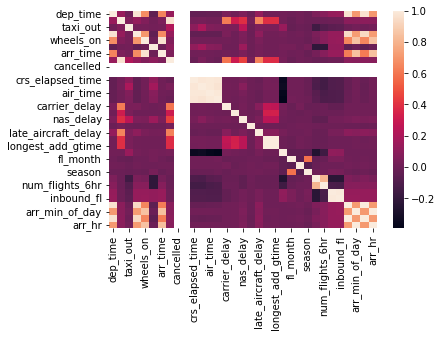

In [7]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr)

In [8]:
X = data.drop(columns='arr_delay')

<AxesSubplot:>

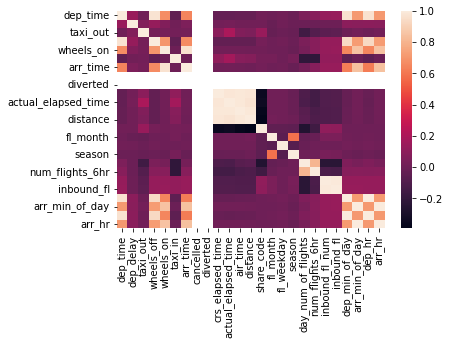

In [9]:
Xcorr = X.corr()
sns.heatmap(Xcorr)

In [10]:
# correlation in X

corr_matrix = X.corr()
for i in corr_matrix:
    for j in corr_matrix:
        if i != j:
            if abs(corr_matrix[i][j]) > 0.7:
                print(f"{i}\t{j}\t{abs(corr_matrix[i][j])}")

dep_time	wheels_off	0.9683936870769133
dep_time	dep_min_of_day	0.9640072310411683
dep_time	arr_min_of_day	0.7080529703657494
dep_time	dep_hr	0.9627668942793404
dep_time	arr_hr	0.7080933930117906
wheels_off	dep_time	0.9683936870769133
wheels_off	dep_min_of_day	0.9351194779484684
wheels_off	arr_min_of_day	0.7176339415484319
wheels_off	dep_hr	0.9340119894101458
wheels_off	arr_hr	0.7176819001658353
wheels_on	arr_time	0.9635107663653586
wheels_on	arr_min_of_day	0.8493305666884455
wheels_on	arr_hr	0.8498714799448674
arr_time	wheels_on	0.9635107663653586
arr_time	arr_min_of_day	0.8424499034837389
arr_time	arr_hr	0.8432464307555028
crs_elapsed_time	actual_elapsed_time	0.9823062996311639
crs_elapsed_time	air_time	0.9887842323642606
crs_elapsed_time	distance	0.9826598335225735
actual_elapsed_time	crs_elapsed_time	0.9823062996311639
actual_elapsed_time	air_time	0.9866774961807293
actual_elapsed_time	distance	0.9686422808588372
air_time	crs_elapsed_time	0.9887842323642606
air_time	actual_elapsed_t

In [11]:
corr_drop = [
    'wheels_off',  #dep/arr time could have information on whether or not time of day affects delay
    'wheels_on',   #wheels off/on probably time spent in tarmac
    'actual_elapsed_time', # info captured by crs elapsed time - air time
    'crs_elapsed_time'
]

data = data.drop(columns=corr_drop)

In [12]:
time_variables = [

    'fl_date',
    'crs_dep_time',
    'crs_arr_time',
    'arr_date',
    'dep_datetime',
    'arr_datetime',

]
data = data.drop(columns=time_variables)

In [13]:
data.dtypes

op_unique_carrier      object
dep_time              float64
dep_delay             float64
taxi_out              float64
taxi_in               float64
arr_time              float64
arr_delay             float64
cancelled             float64
diverted              float64
air_time              float64
distance              float64
share_code              int64
origin_city            object
origin_state           object
dest_city              object
dest_state             object
fl_month                int64
fl_weekday              int64
season                  int64
day_num_of_flights      int64
num_flights_6hr         int64
inbound_fl_num          int64
inbound_fl              int64
dep_min_of_day          int64
arr_min_of_day          int64
dep_hr                  int64
arr_hr                  int64
dtype: object

In [14]:
features = [

    'op_unique_carrier',
    'dep_time',
    'arr_time',
    'arr_delay',
    'diverted',
    'air_time',
    'distance',
    'origin_city',
    'dest_city',
    'fl_month',
    'inbound_fl_num',
    'season',
    'arr_min_of_day',
]
other_features = [
 

    'dep_delay',             
    'taxi_out',             
    'taxi_in',               
    'share_code',             
    'origin_state',           
    'dest_state',             
    'fl_weekday',              
    'day_num_of_flights',      
    'num_flights_6hr',         
    'inbound_fl',             
    'dep_min_of_day',          
    'dep_hr',                  
    'arr_hr',                   
]
data = data.drop(columns=other_features)

In [15]:
# dummy variables - keep in mind the column used from identifiers
# commented out variables = removed

categorical_variables = [
# aircraft
    #'mkt_unique_carrier',
    #'branded_code_share',
    #'mkt_carrier',
    #'mkt_carrier_fl_num',
    'op_unique_carrier',
    #'tail_num',
    #'op_carrier_fl_num',
    
# place
    #'origin_city_name',
    'origin_city', # engineered
    #'origin_state', # engineered
    #'dest_city_name',
    'dest_city', # engineered
    #'dest_state', # engineered
    
#id
    #'origin_airport_id',
    #'dest_airport_id',
    
    #'dup' #duplicate flag marked y if flight is swapped based on form-3a data
]


In [16]:
data = pd.get_dummies(data=data,columns=categorical_variables,drop_first=True)

In [17]:
data.dtypes

dep_time               float64
arr_time               float64
arr_delay              float64
cancelled              float64
diverted               float64
                        ...   
dest_city_Worcester      uint8
dest_city_Wrangell       uint8
dest_city_Yakima         uint8
dest_city_Yakutat        uint8
dest_city_Yuma           uint8
Length: 667, dtype: object

In [18]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

In [19]:
X = data.drop(columns='arr_delay')
y = data['arr_delay']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scale = pd.DataFrame(scaler.transform(X),columns = X.columns)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=123)

In [60]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [61]:
xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)

In [32]:
r2_test = metrics.r2_score(y_test, y_pred)
print(f'R^2 on the test set:\t{r2_test}')

R^2 on the test set:	0.26048316356814205


In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 33.670836


In [36]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [62]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,48.913515,3.259595,48.633692,7.169555
1,47.471805,2.849272,47.504131,7.508048
2,47.067759,2.775241,47.291158,7.512225
3,45.864952,2.911386,46.137100,7.520384
4,44.447618,3.475532,44.991017,6.692479


In [42]:
print((cv_results["test-rmse-mean"]))

0     48.633692
1     47.504131
2     47.291158
3     46.137100
4     44.991017
5     44.909231
6     44.829500
7     44.401410
8     44.269742
9     43.982852
10    43.901987
11    43.836108
12    43.567015
13    43.539997
14    43.486572
15    43.451323
16    43.420437
17    43.215566
18    43.214312
19    43.192462
20    43.182551
21    43.149628
22    43.026566
23    43.026600
24    42.998810
25    42.990390
26    42.871517
27    42.870941
28    42.863827
29    42.838098
30    42.825582
31    42.703445
32    42.692840
33    42.685454
34    42.368796
35    42.236308
36    41.979579
37    41.539197
38    41.427348
39    41.430517
40    40.983664
41    40.917549
42    40.915363
43    40.910252
44    40.908402
45    40.746158
46    40.746823
47    40.734016
48    40.730965
49    40.733135
Name: test-rmse-mean, dtype: float64


In [43]:
from sklearn.metrics import r2_score
metrics.r2_score(y_test,y_pred)

0.26048316356814205

In [44]:
xparamgrid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.1,0.01,0.001],
}
n = 5

In [45]:
xmodel = xgb.XGBRegressor()
xgrid = GridSearchCV(estimator=xmodel, param_grid=xparamgrid, cv=n, scoring='r2', verbose=1, n_jobs=-1)
xgrid_result = xgrid.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [46]:
xbest_r2 = xgrid_result.best_score_
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {xbest_r2}')
print(f'The best hyperparameter settings:\n{xgrid_result.best_params_}')

The best hyperparameter settings achieve a cross-validated R^2 of: 0.9202186845213243
The best hyperparameter settings:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [47]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 300)

In [51]:
xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 17.904662


In [52]:
r3_test = metrics.r2_score(y_test, y_pred)
print(f'R^2 on the test set:\t{r3_test}')

R^2 on the test set:	0.7908910975291115


In [55]:
from sklearn.model_selection import cross_val_score
train_score = cross_val_score(xg_reg,x_train,y_train,cv=10)

In [58]:
print(f'XGBRegressor:\tScore:\n\t{round(train_score.mean(),2)*100}')

XGBRegressor:	Score:
	73.0


In [59]:
train_score

array([0.64846409, 0.81251957, 0.83912963, 0.54885857, 0.85767131,
       0.59255067, 0.65155959, 0.81652239, 0.79175726, 0.73650914])

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.